# HW 3: Classification, Evaluation, and Deployment

In this homework, you will experience a complete machine learning cycle from data preparation to deployment. You will prepare/preprocess a dataset, make a model, evaluate models to find the best fit, and deploy it to a simple web page. Our main objective is to make you try classification and evaluation methods, so we will only apply essential data preprocessing techniques but mainly focus on classification and evaluation.

We will use the **Adult** dataset from the UCI repository and more information about the data is available [here](http://archive.ics.uci.edu/ml/datasets/Adult). Since we have removed and changed the dataset for a grading purpose, use the one that we provide on ilearn.

The dataset contains the information to check whether income exceeds $50K/yr based on census data. The datasets consist of 14 attributes and one binary class variable:

- income: >50K, <=50K

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

and we have a binary class which can be `>=50` or `<50`.

**NOTE**
- Unlike the labs, each function you make here will be **graded**, so it is important to *strictly* follow the instruction.
- **Import** all necessary libraries yourself whenever needed. Failure to run any code can affect your grade.

## Contents

- **Total points: 6.0 pt**

0. Preparation (0.7 pt)
 - Task 1: Drop missing values (0.2 pt).
 - Task 2: Assign X and y (0.1 pt).
 - Task 3: One-hot encoding (0.1 pt).
 - Task 4: Train test split (0.1 pt).
 - Task 5: Standardization (0.2 pt).
1. Classification (2.9 pt)
 - Task 6: Random forest (0.5 pt).
 - Task 7: SVM with diverse kernels (0.4 pt).
 - Task 8: Decision tree and Random Forest (2.0 pt).
2. Evaluation (1.8 pt)
 - Task 9: Accuracy, Precision, Recall, F1-score (0.3 pt).
 - Task 10: AUC/AUPRC (0.3 pt).
 - Task 11: Apply them together with scikit-learn (0.4 pt).
 - Task 12: Manual implementation of performance metrics (0.8 pt).
3. Deployment (0.6 pt)
 - Task 13: Save models into a file using pickle (0.3 pt).
 - Task 14: DASH deployment (0.3 pt).

# 0. Preparation

##### Student information

Please provide your information for automatic grading.

In [94]:
STUD_SUID = 'toek3476'
STUD_NAME = 'Tommy Ekberg'
STUD_EMAIL = 'toek3476@student.su.se'

#### Basic libraries

These libraries will be frequently used throughout the homework. Do not change the block below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
RANDOM_STATE = 46458 #Do not change it!
np.random.seed(RANDOM_STATE) #Do not change it!

#### Load the dataset

Use the **Adult** dataset located on ilearn, and load it here using pandas. 

In [3]:
adult = pd.read_csv("datasets/adult.data", sep=",", header=None, skipinitialspace=True)

You can run the line below to give the dataframe proper column names.

In [4]:
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',  'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Here you can find out some basic information by calling *info(), head()*, and *describe()*.

In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adult.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Task 1: Drop missing values (0.2 pt)

It seems like there is no null data. However, if you read the description of the dataset, it says that there are missing parts represented as "?". You can count them by using the same technique we used for checking nulls in the previous lab. We have missing values in specific columns only, and it is about 5% of data records.

- Task 1-1: Count how many null values **each column** has and save it into the variable `null_values` (0.1 pt).

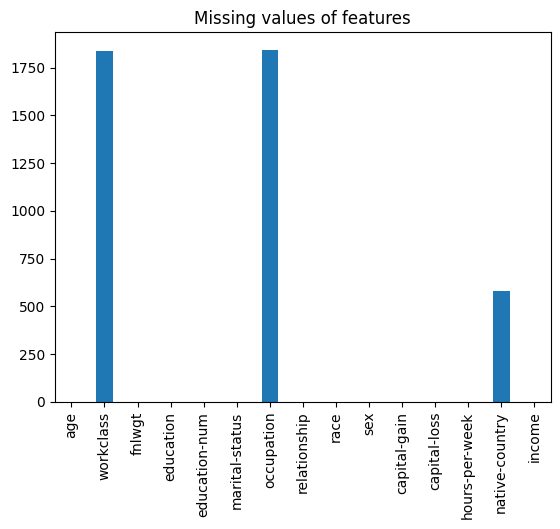

In [8]:
null_values = (adult == "?").sum(axis=0)

ax = null_values.plot.bar()
ax.set_title("Missing values of features")

plt.show()

In [9]:
print(null_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


There are many ways to handle missing values, such as imputation or putting median/mean values, but we will practice the simplest way: removing the rows with missing values.

- Task 1-2: Complete the function below which removes any rows with missing values (0.1 pt).

In [10]:
def drop_missing_values(df, miss):
    """
    Input: 
      df: the dataframe (adult in our case)
      miss: a character to represent missing value ("?" in our case)
      
    Output: the dataframe without the missing values

    Step 1: Replace the value 'miss' with np.nan.
    Step 2: Drop the nan values and store the result in data_dropped.
    Step 3: Return data_dropped
    
    """


    
    data_dropped = df.replace(miss, np.nan)

    data_dropped = data_dropped.dropna()

    return data_dropped



- Apply your function to our dataset `adult` and save the result to `adult_dropped`. This part should be done correctly to get the point. You need to put our dataset and the indicator for missing values.

In [11]:
adult_dropped = drop_missing_values(adult, "?") # CHANGE IT


- The output of the function should have the same attributes but only less number of the rows. Check how many rows are removed. Your dataset should have 30,162 rows!

In [12]:
adult_dropped.shape

(30162, 15)

#### Task 2: Assign X and y (0.1 pt)

Then let's split our dataset into two parts (`X` for attributes and `y` for labels) to use scikit-learn's various methods.
- Use `adult_dropped`.
- `X` should have all the attributes without the labels (the last column).
- `y` should be a Pandas Series only with the labels.

In [13]:
X = adult_dropped.drop(columns=["income"]) # CHANGE IT!
y = adult_dropped["income"] # CHANGE IT!

- Check the type and size here. We expect (30162, 14) for attributes (`X`) and (30162, ) for labels (`y`).

In [14]:
(X.shape, y.shape, type(X), type(y))


((30162, 14), (30162,), pandas.core.frame.DataFrame, pandas.core.series.Series)

#### Task 3: One-hot encoding (0.1 pt)

Unfortunately, scikit-learn does not support categorical attributes very well even for decision tree, and that means we need to convert them into reasonal form of numeric data to fit the algorithms. There is one way called one-hot encoding, which transforms the categorical data into multiple numeric columns for each possible value. There are various ways to apply this, especially using [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) but here we will use the pandas function to keep the dataframe structure.

- Finish one_hot_encoding function which applies one-hot encoding to a given dataframe.


In [15]:
def one_hot_encoding(df):
    """
    Input:
        df: the attributes (X in our case)
    Output: one-hot encoded dataframe
    
    Step 1: Use pd.get_dummies to convert df to a one-hot-encoded form. 
            Enable an option called drop_first to remove duplication.
    Step 2: Return the one-hot-encoded dataframe.
    
    * Those steps and suggested method are just for your convenience. You can use your own choice of methods.
      However, the result should be the same as the one created with the steps above.
    """
    
    df_onehot = pd.get_dummies(df, drop_first=True) # CHANGE IT
    return df_onehot

- Create `X_onehot` by calling `one_hot_encoding` function with `X`.

In [16]:
X_onehot = one_hot_encoding(X)

- Check your result by calling any methods you learned. If you successfully followed the instruction, the output (`X_onehot`) should have 96 columns.

In [17]:
X_onehot.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Task 4: Train test split (0.1 pt)

We also need to split our dataset further into four parts for evaluation.

- Use scikit-learn's `train_test_split` function to divide the dataset into four parts.
- Follow the instruction below carefully to get a point!.
    - Use `X_onehot` and `y`.
    - Assign 20% to a test set.
    - Use our random state (`RANDOM_STATE`)
    - Enable stratify option.

In [18]:
# Remove the assigned values and write the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.2, stratify=y)

- Check the type and size here. We expect 24,129 data instances in the training set.

In [19]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((24129, 96), (6033, 96), (24129,), (6033,))

#### Task 5: Standardization (0.2 pt)

After removing the missing value and split X and y, we need to take care of our numeric attributes. As you can check from `describe()` function, we have numeric attributes with different mean and standard deviation values. Not all machine learning models require standardization of numeric attributes, but some do. In this homework, SVM might be the case that the standardization is required. It might be better to make standardized version when performing data preparation. 

- One-hot encoded data does not need to be standardized! So you need to choose the numeric columns only
- For this task, you need to import sklearn's `StandardScaler`.

In [20]:
from sklearn.preprocessing import StandardScaler

def standardize(X_train, X_test, numeric):
    """
    Input:
        - X_train: A split training set from Task 4
        - X_test: A split test set from Task 5
        - numeric: Numeric columns that should be standardized
    Output:
        - X_train_st: A standardized numeric attributes (ndarray)
        - X_test_st: A standardized numeric attributes (ndarray)
    
    Step 1: Initialize StandardScaler into the variable 'sc'.
    Step 2: Create X_train_numeric, X_test_numeric by selecting numeric columns from original X_train and X_test.
            Use the input 'numeric' to choose the columns.
    Step 3: Fit StandardScaler on X_train_numeric. You should only use the numeric columns only.
    Step 4: Use trained StandardScaler and run transform function both on X_train_st (for the training set) 
            and X_test_st (for the test set). This job will standardize both training and test sets based on
            the statistics of training set. You should only use numeric attributes.
    Step 5: Return X_train_st, X_test_st
    
    """
    
    # Step 1
    sc = StandardScaler() # CHANGE IT
    
    # Step 2
    X_train_numeric = X_train[numeric] # CHANGE IT
    X_test_numeric = X_test[numeric] # CHANGE IT
    
    # Step 3
    scaler = sc.fit(X_train_numeric)
    
    # Step 4
    # Assign two outputs of transformation function to X_train_st (for the training set) and X_test_st (for the test set)
    X_train_st = scaler.transform(X_train_numeric) # CHANGE IT
    X_test_st = scaler.transform(X_test_numeric) # CHANGE IT
    
    # X_train_st = pd.DataFrame(X_train_st, columns=numeric)
    # X_test_st = pd.DataFrame(X_test_st, columns=numeric)

    # Step 5
    # Note that those two variable should only contain numeric attributes, not the whole ones.
    return X_train_st, X_test_st

In [21]:
def merge(X_train, X_test, X_train_numeric, X_test_numeric, numeric):
    # DO NOT CHANGE THIS FUNCTION
    # This function is to ensure that the datasets keep the Pandas DataFrame format.
    if X_train.shape == (0, 0): return pd.DataFrame([0]), pd.DataFrame([0])
    
    X_train_st_df = X_train.copy()
    X_train_st_df[numeric] = X_train_numeric
    X_test_st_df = X_test.copy()
    X_test_st_df[numeric] = X_test_numeric
    
    return X_train_st_df, X_test_st_df

- Find numeric columns first and assign the column names into the variable `numeric`. You can use `.info()` or `.describe()` function to find numeric columns.

In [22]:
numeric = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]


- Call `standardize` function to standardize numeric attributes. In this case, the output should only contain numeric attributes. We will merge the categorical features later on.

In [23]:
X_train_numeric, X_test_numeric = standardize(X_train, X_test, numeric)


- Check the mean and standard deviation values of the standardized dataset by running the blocks below. The dataset now should have near zero mean and one standard deviation.

In [24]:
X_train_numeric.mean(axis=0)

array([-2.36464759e-16, -4.38770225e-17,  2.26747029e-16, -2.82697595e-17,
        3.44537694e-17,  3.03310961e-17])

In [25]:
X_train_numeric.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

Unfortunately scikit-learn's StandardScaler does not return DataFrame. Run the block below to recover DataFrame and categorical features.

In [26]:
X_train_st, X_test_st = merge(X_train, X_test, X_train_numeric, X_test_numeric, numeric)



Now, the final outcome (`X_train_st`) should have 96 columns again, where the numeric attributes have zero mean and one standard deviation.

In [27]:
X_train_st.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,2.412900e+04,2.412900e+04,2.412900e+04,2.412900e+04,2.412900e+04,2.412900e+04,24129.000000,24129.000000,24129.000000,24129.000000,...,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000,24129.000000
mean,-2.364648e-16,-4.387702e-17,2.267470e-16,-2.826976e-17,3.445377e-17,3.033110e-17,0.067844,0.739649,0.035227,0.084338,...,0.001160,0.003730,0.000373,0.002445,0.001160,0.000622,0.000622,0.911144,0.002238,0.000497
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,0.251483,0.438835,0.184358,0.277900,...,0.034046,0.060961,0.019310,0.049389,0.034046,0.024926,0.024926,0.284541,0.047255,0.022296
min,-1.629466e+00,-1.660136e+00,-3.561849e+00,-1.467277e-01,-2.197327e-01,-3.342760e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.929936e-01,-6.816399e-01,-4.313815e-01,-1.467277e-01,-2.197327e-01,-8.091263e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.086075e-01,-1.084830e-01,-4.007307e-02,-1.467277e-01,-2.197327e-01,-8.091263e-02,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.518215e-01,4.474502e-01,7.425438e-01,-1.467277e-01,-2.197327e-01,3.372729e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.921666e+00,1.216896e+01,2.307777e+00,1.342329e+01,9.429462e+00,4.853677e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After finishing a simple data processing, let's proceed to our main task, classification.

# 1. Classification

In this assignment, we will run random forest (RF), and support vector machine (SVM) with different kernels using scikit-learn. Then we will implement score functions for decision trees and main functions for random forests to understand the concepts better. We will continue to use the pre-processed Adult dataset from the section zero (Task 1-5).

#### Task 6: Random forest (graded, 0.5 pt)

Here you will run the random forest algorithm using scikit-learn, together with cross-validation. Detailed information about the random forest in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Your task is as follows:
 1. Create a random forest classifier `rf` with the random state defined above (`RANDOM_STATE`). Do not specify any other parameters.
 2. Report an average cross-validation score `rf_cross_val_score` with stratified k-fold with **cv=5**. You should report the average score, not a list of the scores. Use `X_onehot` and `y`, not the training or test set (0.2 pt). 
 - ***Note that you are reporting an average cross validation score, not a list of scores.***


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = RANDOM_STATE) # CHANGE IT

In [29]:
from sklearn.model_selection import cross_val_score

rf_cross_val_score = cross_val_score(rf, X_onehot, y, cv=5) # CHANGE IT
rf_cross_val_score = np.mean(rf_cross_val_score)

- Run this line to check your score. Your score should be above 0.80.

In [30]:
rf_cross_val_score

0.8499438378485088


 3. Run grid search `gs` with a single dictionary `grid_dict` with two keys 1) max_depth from 2 to 4 (included), and 2) min_samples_split from 2 to 5 (included) and report the best classifier into the variable `rf_best_classifier`. Set **cv=5** for grid search cross-validation. Use our training set (`X_train_st` and `y_train`) to perform the grid search. This task can take a few minutes depending on computing power (0.3 pt).

In [31]:
grid_dict = [
  {'max_depth': [2, 3, 4], 'min_samples_split': [2,3,4,5]}]


In [32]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, grid_dict, cv = 5) # CHANGE IT
gs.fit(X_train_st, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46458),
             param_grid=[{'max_depth': [2, 3, 4],
                          'min_samples_split': [2, 3, 4, 5]}])

- Report your best classifier here.

In [33]:
rf_best_classifier = gs.best_estimator_ # CHANGE IT

In [34]:
rf_best_classifier

RandomForestClassifier(max_depth=4, min_samples_split=5, random_state=46458)

#### Task 7: SVM with diverse kernels (graded, 0.4 pt)

We already tried a simple SVC with the RBF kernel before. Here you will run SVM again, but with different kernels, and together with cross-validation. Detailed information about SVC in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

Your task is as follows:

  1. Create a standard SVC classifier `svc` without setting any parameter.
  2. Run grid search with a list of two parameter dictionaries, one with kernel = ['linear', 'poly', 'rbf'] and the other one with C = [1, 10, 100]. This means you have to create a list containing two different dictionaries inside. Report the best classifier into the variable `svm_best_classifier`. Set **cv=4** for grid search cross-validation. Use `X_train_st` and `y_train`. This task can take a few minutes depending on computing power (0.3 pt).


In [35]:
from sklearn.svm import SVC
svc = SVC() # CHANGE IT

In [36]:
grid_dict = [
  {'kernel': ['linear', 'poly', 'rbf']},
  {'C': [1,10,100]},
] 
gs = GridSearchCV(svc, grid_dict, cv = 4, verbose = 2) # CHANGE IT
gs.fit(X_train_st, y_train)
svm_best_classifier = gs.best_estimator_# CHANGE IT

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ......................................kernel=linear; total time=  20.5s
[CV] END ......................................kernel=linear; total time=  20.6s
[CV] END ......................................kernel=linear; total time=  17.8s
[CV] END ......................................kernel=linear; total time=  15.4s
[CV] END ........................................kernel=poly; total time=  12.7s
[CV] END ........................................kernel=poly; total time=  12.8s
[CV] END ........................................kernel=poly; total time=  12.4s
[CV] END ........................................kernel=poly; total time=  12.3s
[CV] END .........................................kernel=rbf; total time=  15.2s
[CV] END .........................................kernel=rbf; total time=  15.3s
[CV] END .........................................kernel=rbf; total time=  15.4s
[CV] END ........................................

In [37]:
print(svm_best_classifier)

SVC()


  3. Take the best model from grid search and report the test score to `svm_gs_score` (0.1 pt).

In [38]:
svm_gs_score = gs.best_score_ # CHANGE IT

In [39]:
print(svm_gs_score)

0.8537028095584805


#### Task 8: Decision tree (2.0 pt)

**Task 8 involves manual implementation and uses a different dataset. If you would like to complete scikit-learn related tasks using the same dataset first, please move on to Task 9 and on and come back to Task 8 later.**

We will now implement a few modules for decision tree. Follow the instruction carefully so that you can return a correct result. This task is composed of two sections as follows:

  - 8-1. Entropy, gini index, and information gain (0.7 pt)
  - 8-2. Tree implementation (1.3 pt)

First section of this task is to create three functions used to evaluate and grow the tree, which are covered in the lecture. Entropy, gini index are two main scores used for it. Information gain is the final score to choose a feature for dividing the node. Those scores are essencial for decision tree to work properly and a wrong score can lead to choosing the features that are not proper for creating a high-performing tree.

- For simplicity, you will not use the **adult** dataset in this task but will use a simple **playgolf** dataset with categorical attributes.

- Task 8 is a continuous task and the grade is evaluated by the result of the function. Since one function calls other functions in the task, failing to develop one function can affect the whole grade.

Import playgolf dataset to `playgolf`. You can find it in the homework file.

In [40]:
playgolf = pd.read_csv('datasets/playgolf.csv')

In [41]:
playgolf.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [42]:
playgolf.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


- Task 8-1: Create a gini index function (0.2 pt).
  - The Gini Index is calculated by subtracting the sum of the squared probabilities of each class from one.
  - You should double check the lecture slides and the examples below to make sure you made a correct function.
  - You can use collections.Counter() to count labels of the dataset.

In [43]:
from sklearn.externals._packaging.version import collections


def gini(dataset):
    """
    A function that calculates gini index of a given list.
    
    Input
     - dataset: a list of labels.
    Output
     - impurity: gini index of the list.
    
    You do not need to keep the output name of this function, the grade only depends on the correct outputs.
    
    """
    cyanKonkret = collections.Counter(dataset)

    N = len(dataset)
    sum = 0

    for key in cyanKonkret.keys():
        probability = cyanKonkret[key]/N

        sum += probability * probability

    impurity = 1 - sum

    return impurity

- Your gini index is expected to have the following results:
  - `0.5` for `[0,0,1,1]`
  - `0.4082` for `[0,0,0,0,0,1,1]`

In [44]:

gini([0,0,1,1])

0.5

- Report a gini score of the `Temp` attribute of **playgolf** to `gini_score` (0.2 pt).

In [45]:
gini_score = gini(playgolf["Temp"]) # CHANGE IT

- Print your score here!

In [46]:
gini_score

0.653061224489796

- Task 8-2: Create an entropy function (0.2 pt).
  - You should double check the lecture slides and the examples below to make sure you made a correct function. 
  - You can use collections.Counter() to count labels of the dataset.

In [47]:
import math
from sklearn.externals._packaging.version import collections

def entropy(dataset):
    """
    A function that calculates entropy of a given list.
    
    Input
     - dataset: a list of labels.
    Output
     - impurity: entropy value of the list.
    
    You do not need to keep the output name of this function, the grade only depends on the correct outputs.
    
    """
    limeKonkret = collections.Counter(dataset)

    N = len(dataset)

    sum = 0

    for key in limeKonkret.keys():
        probability = limeKonkret[key] / N

        sum -= probability * math.log2(probability)

    impurity = sum # CHANGE IT
    return impurity

- Your entropy is expected to have the following results:
  - `1.0` for `[0,0,1,1]`
  - `0.8631` for `[0,0,0,0,0,1,1]`

In [48]:
entropy([0,1,0,0,0])

0.7219280948873623

In [49]:
entropy([0,0,0,0,0,1,1])

0.863120568566631

- Report a gini score of the `Windy` attribute of **playgolf** to `entropy_score` (0.2 pt).

In [50]:
entropy_score = entropy(playgolf["Windy"]) # It says gini score, but I pressume you meant entropy score 
gini_windy_score = gini(playgolf["Windy"]) # In the case you wanted the gini score

- Print your score here!

In [51]:
entropy_score

0.9852281360342516

- Task 8-3: Create an information gain function (0.3 pt). 
  - **DO NOT use entropy but only use the gini index for scores.**
  - Check the lecture slides and the examples below to make sure you made a correct function.

In [52]:
def information_gain(labels_start, labels_split):
    """
    Calculate information gain when we have an information of label distribution before and after split operation.
    This information gain function receives two values:
    
    Input:
      - labels_start: A single list of all current labels
        e.g.) [0,0,0,0,1,1,1,1]
      - labels_split: A list of lists representing split 
        e.g.) [ [0,0,1,1], [1,1,0,0] ]
    
    Then we can calculate information gain by calculating the gini index before splitting,
    and substract (gini index of the subset * proportion of the subset) for each list after splitting from there.
    
    Output:
      - info_gain: Information gain
    
    You do not need to keep the output name of this function, the grade only depends on the correct outputs.
    
    """
    
    giniStart = gini(labels_start)
    sum = 0

    for split in labels_split:
      proportion = len(split) / len(labels_start)
      giniSplit = gini(split)

      sum += proportion * giniSplit

    info_gain = giniStart - sum # CHANGE IT
    return info_gain

In [53]:
information_gain([0,0,0,0,1,1,1,1], [[0,0,1,1],[0,0,1,1]])

0.0

- Your information gain is expected to have the following results:
  - `0.0` for `[0,0,0,0,1,1,1,1], [[0,0,1,1],[0,0,1,1]]`
  - `0.5` for `[0,0,0,0,1,1,1,1], [[0,0,0,0],[1,1,1,1]]`
  - `0.125` for `[0,0,0,0,1,1,1,1], [[0,0,1,0],[1,0,1,1]]`

- Here we have labels before and after splitting information. Use those two values to calculate information gain and report it to `info_gain_score` using your own `information_gain` function (0.3 pt).

In [54]:
labels_start = [1,2,1,2,2,1,2,1,3,3,3]
labels_split = [[3,3,3],[1,2,1,1],[2,2,1,2]]

In [55]:
info_gain_score = information_gain(labels_start, labels_split)

- Print your score here!

In [56]:
info_gain_score

0.38842975206611574

Now we have some score functions required to construct the tree. Then it is time to create the tree itself! 

- Note that this assignment does not aim to make whole working decision trees and random forests but the core functions to understand the algorithm.

 The tree works as follow:

- Starting from the root, you choose few attributes to test. This does not need to be all the attributes the dataset has.
- Iterate chosen attributes and calculate information gain, assuming you split the dataset based on each attribute.
- Choose the column (attribute) with maximum information gain and split the dataset once again.
- Continue growing the tree by choosing the column in the same say until we meet a closing criterion.

Here, we will give you a basic `split` function used to split the dataset based on the attribute. This split function receives the attributes (`X`), the label (`y`) and one `feature` (attribute) of it, and split the whole dataset based on the categories of the selected feature and return split data subsets and label subsets. Using those split values, you are going to make few functions needed for decision trees and random forests. 

In [57]:
def split(X, y, attr):
    
    split_attrs = []
    split_labels = []
    
    for val in X[attr].unique():
        attr_subset = []
        label_subset = []
        
        for idx, row in X.iterrows():
            
            if row[attr] == val:
                attr_subset.append(row)
                label_subset.append(y[idx])
                
        split_attrs.append(pd.DataFrame(attr_subset))
        split_labels.append(label_subset)
        
    return split_attrs, split_labels

def aux_split(split_attr, split_labels):

    split_attr = [s.reset_index(drop=True) for s in split_attr]
        
    return split_attr, split_labels

Check out the result by running the function below and also check the Windy column to understand what the function does.

In [58]:
split(playgolf.drop('Play Golf', axis=1), playgolf['Play Golf'], 'Windy')

([     Outlook  Temp Humidity  Windy
  0      Rainy   Hot     High  False
  2   Overcast   Hot     High  False
  3      Sunny  Mild     High  False
  4      Sunny  Cool   Normal  False
  7      Rainy  Mild     High  False
  8      Rainy  Cool   Normal  False
  9      Sunny  Mild   Normal  False
  12  Overcast   Hot   Normal  False,
       Outlook  Temp Humidity  Windy
  1      Rainy   Hot     High   True
  5      Sunny  Cool   Normal   True
  6   Overcast  Cool   Normal   True
  10     Rainy  Mild   Normal   True
  11  Overcast  Mild     High   True
  13     Sunny  Mild     High   True],
 [['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
  ['No', 'No', 'Yes', 'Yes', 'Yes', 'No']])

In [59]:
playgolf['Windy']

0     False
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
Name: Windy, dtype: bool

- Task 8-4: First thing we need to make is the function to choose the attributes. So we receive a dataframe and a strategy, and return a list of chosen columns. In this case we usually do it 'with replacement', meaning that the same column can be chosen twice. We can have three different options for choosing attributes (0.3 pt).
  - "sqrt": use the sqrt of total column size to choose the columns
  - integer numbers: use the received number for  
  - "max": choose the same number of columns as its original size - just return the columns

In [60]:
def select_attributes(X, strategy):
    """
    Input
        - X: Attributes of the node.
        - y: dataset labels.
        - strategy: strategy for the number of attributes that the algorithm chooses.
    Output
        - attributes: a list of selected attributes

    Step 1: Check the strategy. If the type of strategy is integer, number of attribute to choose will be that number.
            If it's "sqrt", then it will be the square root of column size (if it is a floating point number, round it down), 
            if "max", it's the size of dataset's columns. Put appropriate value to 'num_attr'.
    Step 2: Choose 'num_attr' column names from X.columns without allowing replacement. Use np.random.choice. 
            Assign the result to 'attributes'
    Step 3: return 'attributes'.

    """
    num_attr = 0

    if type(strategy) is int:
        num_attr = strategy
    elif strategy == "sqrt":
        num_attr = math.floor(math.sqrt(len(X.columns)))
    elif strategy == "max":
        num_attr = len(X.columns)
    else:
        return None

    attributes = np.random.choice(X.columns, num_attr, replace=False)
        
    return attributes # CHANGE IT


- You can test your method here!

In [61]:
select_attributes(playgolf.drop('Play Golf', axis=1), 2)

array(['Outlook', 'Temp'], dtype=object)

In [62]:
select_attributes(playgolf.drop('Play Golf', axis=1), "max")

array(['Outlook', 'Windy', 'Humidity', 'Temp'], dtype=object)

- Task 8-5: Now we have a method to choose attributes. Then now we need to make a function to iterate those selected attributes in the dataset and eventually can make a function for choosing the best feature to split, given the dataset of the node (It will be a full dataset if we run this function on the root node.). The function receives the datasets (`X`, `y`) and the list of selected attributes calculated by `selected_attributes` function (or it can also be user input), and returns the best feature among the chosen one and it's information gain. This process is one of the core processes of the decision tree (0.3 pt). 

In [63]:


def check_info_gain_per_attribute(X, y, attributes):
    """
    Input
        - X: Attributes of the node.
        - y: dataset labels.
        - attributes: the selected attributes to test.
    Output
        - best_feature: The best feature in terms of information gain.
        - best_gain: The information gain value when the dataset is split by the best feature.
        
    Step 1: Initialize two variables: Set best_info_gain to zero and best_attr to None.
    Step 2: You should iterate the attributes we get as an input.
            For each chosen attribute, 'split' the dataset using the split function we have offered.
            This will return sets of attributes and labels. Save the split attributes and labels.
    Step 3: Calculate information gain of the current split in the iteration. 
            Use information_gain function you created and the label information from Step 3.
    Step 4: Compare it to the current best gain, if the new gain is higher (not higher or equal to), reset best_gain and best_feature.
    Step 5: Return best_attr, best_info_gain.
    
    
    """
    # Step 1
    best_info_gain = 0 # CHANGE IT
    best_attr = None

    
    # Step 2 - You should create a for loop and Step 4 and 5 will run inside the loop

    for attribute in attributes:

        attri, lab = split(X, y, attribute)

        attri, lab = aux_split(attri, lab)

        # Step 3
        current_information_gain = information_gain(y, lab)
        # Step 4
        if best_info_gain < current_information_gain:
            best_info_gain = current_information_gain
            best_attr = attribute

    # Step 5
    return best_attr, best_info_gain

- Now we can check and you need to answer here! - which attribute is better in terms of information gain between Windy and Outlook?
  - Answering this question is also part of Task 8-5.
  - You should not put the string value yourself. Save the outcome of check_info_gain_per_attribute function that answers the question.

In [64]:
better_attribute = check_info_gain_per_attribute(playgolf.drop('Play Golf', axis=1), playgolf['Play Golf'], ['Outlook', 'Windy']) # CHANGE IT


In [65]:
print(better_attribute)

('Outlook', 0.11632653061224485)


Task 8-6: Now we can create a wrapper function that calls two separate function: `select_attributes`, and `check_info_gain_per_attribute`. Now, the function receives data `X`, `y`, and `strategy` and calls `select_attributes` with `strategy` to get a list of attributes. Next it calls `check_info_gain_per_attribute` with selected attributes and finally return the best attribute and the corresponding information gain (0.2 pt).

In [66]:
# 0.2 pt
def best_split(X, y, strategy):
    """
    Input
        - X: Attributes of the node.
        - y: dataset labels.
        - strategy: strategy for the number of attributes that the algorithm chooses.
    Output
        - best_feature: The best feature in terms of information gain.
        - best_gain: The information gain value when the dataset is split by the best feature.

    Complete the function following the instruction above
    """


    attributes = select_attributes(X, strategy)


    best_attr, best_info_gain = check_info_gain_per_attribute(X, y, attributes) # CHANGE IT
    return best_attr, best_info_gain

- Find the best split of the playgolf dataset with `strategy` = `sqrt`. Report the best feature and best gain to `best_attr_playgolf` and `best_gain_playgolf`.
   - Answering the question here is part of Task 8-6

In [67]:
np.random.seed(RANDOM_STATE)
best_attr_playgolf, best_gain_playgolf = best_split(playgolf.drop('Play Golf', axis=1), playgolf['Play Golf'], "sqrt") # CHANGE IT

In [68]:
# TEST YOUR RESULT HERE
best_attr_playgolf, best_gain_playgolf

('Outlook', 0.11632653061224485)

Task 8-7: Now we have functions 1) to split the function based on one chosen feature (`split`) and 2) to choose the best feature to split (`best_split`). The next step will be to create one tree with all the information we have. Finish the function `build`. This function makes one tree of the random forest by using two previous functions. Since this function is a recursive one, it will return a complete tree, not a node (0.5 pt).

In [69]:
# 0.5 pt

def build(X, y, strategy, max_depth = 5, min_samples_leaf = 5, tol=0.00001, _depth = 0):
    """
    Input
        - X: Attributes of the data
        - y: dataset labels
        - strategy: strategy for the number of attributes that the algorithm chooses.
        - max_depth: maximum allowed depth of the tree
        - min_samples_leaf: minimum number of data instances required to continue
        - tol: information gain tolerance value.
        - _depth: current depth of tree starting from zero (root). only controlled by the algorithm.
    Output
        - node: a leaf or middle node.
    
    Step 0: Consider some stopping criteria. We do not continue this function if the following contidions are met:
        1. if the current depth number is bigger than max_depth
        2. if the current sample size is smaller than min_samples_leaf
      Check these conditions and terminate the function if required. When terminating, return False
    Step 1: Run the best split function to get the best attributes and the best information gain for the node.
    Step 2: Examine the best information gain value. If it is lower than the tolerance value (tol), 
            return the node with the best information gain value. The node should be a dictionary form 
            {"type": "leaf", "gain": the best information gain}.
    Step 3: If the best information gain is higher, split the dataset with the chosen best attribute.
    Step 4: Create an empty list called "branches" to save all the branches of the current node.
    Step 5: For each split attributes and labels, run this 'build' function recursively and store the result
            to the  "branches" list **only if the returned value is not False (from termination)**.
            Do not forget to increase the depth value so we can trace the max_depth.
    Step 6: After all the recursion process is done, return the root node with its best attribute, branch information,
            and the best information gain.
    """
    
    # Step 0
    if _depth > max_depth:
        return False
    
    if len(X) < min_samples_leaf:
        return False
    
    # Step 1
    best_attr, best_info_gain = best_split(X = X, y = y, strategy = strategy) # Change it
    
    # Step 2 - Change the if condition and the return value
    if best_info_gain < tol:
        return {"type": "leaf", "gain": best_info_gain} # CHANGE IT
    
    # Step 3
    attri, lab = split(X, y, best_attr)

    split_attrs, split_labels = aux_split(attri, lab) # CHANGE IT
    

    # Step 4
    branches = []
    
    # Step 5 - You should create a for loop following the manual
    for attr, lab in zip(split_attrs, split_labels):
        result = build(X = attr, y= lab, strategy = strategy, max_depth = max_depth, min_samples_leaf= min_samples_leaf,_depth = _depth+1)
        if result is not False:
            branches.append(result)
    
    # Step 6 - Change None values to the correct values
    return {
        "type": "node",
        "best_feature": best_attr,
        "branches": branches,
        "value": best_info_gain
    }

- Bulid one tree using the whole playgolf dataset and report the tree to the variable 'single_tree'. Set the strategy to "sqrt", max_depth to 3, and min_samples_leaf to 2. You do not need to specify the tolerance value (0.5 pt).

In [70]:
np.random.seed(RANDOM_STATE)
single_tree = build(playgolf.drop('Play Golf', axis=1), playgolf['Play Golf'], "sqrt", 3, 2) # CHANGE IT

- Print your result here

In [71]:
single_tree

{'type': 'node',
 'best_feature': 'Outlook',
 'branches': [{'type': 'node',
   'best_feature': 'Humidity',
   'branches': [{'type': 'leaf', 'gain': 0}, {'type': 'leaf', 'gain': 0}],
   'value': 0.48},
  {'type': 'leaf', 'gain': 0},
  {'type': 'node',
   'best_feature': 'Temp',
   'branches': [{'type': 'node',
     'best_feature': 'Windy',
     'branches': [{'type': 'leaf', 'gain': 0}],
     'value': 0.4444444444444444},
    {'type': 'leaf', 'gain': 0}],
   'value': 0.013333333333333308}],
 'value': 0.11632653061224485}

# 2. Evaluation 

#### Task 9: Accuracy, Precision, Recall, F1-score (0.3 pt)

We start to use our original dataset again! Remember that we have two standardized datasets (`X_train_st` and `y_train`).. You will evaluate the random forest and the support vector machine classifier with various performance measures you have learned besides accuracy, such as precision, recall, and F1-score, also using scikit-learn. Here we continue to use the same dataset.

- Use standardized datasets (`X_train_st`, `y_train`...) throughout the task. To use the various score functions here, you need to convert the labels of `y_train` and `y_test` (`<=50K`, `>50K`) to numeric ones (0 or 1) since the score functions will not recognize the categorical labels. Create `y_train_numeric` and `y_test_numeric` with the converted labels (`<=50K` to 0, and `>50K` to 1). Refer to the previous labs. (0.1 pt)

In [72]:
# Subtask 1: 0.1 pt

y_train_numeric = y_train.replace({"<=50K": 0, ">50K": 1}) # CHANGE IT
y_test_numeric = y_test.replace({"<=50K": 0, ">50K": 1}) # CHANGE IT

Check if you successfully replaced the values here.

In [73]:
y_train_numeric.unique(), y_test_numeric.unique()


(array([0, 1], dtype=int64), array([1, 0], dtype=int64))

- Create an instance of an SVC classifier with the **polynomial** kernel and fit the model using the training set. You can use any variable name for your SVC instance. Report precision score, recall score, and F1-score using the test set, and save it into the variable `recall_score_svc`, `precision_score_svc`, and `f1_score_svc` (0.2 pt). 
  - You can find out the information about the performance measures [here](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics). We require you to calculate the scores using the following functions in scikit-learn: `precision_score`, `recall_score`, and `f1_score`. 
  - Use the `macro` average option - you can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).
  - There is no partial point if you are correct on only some of them.

In [74]:
# Subtask 2: 0.2 pt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

svc = SVC(kernel="poly")

svc.fit(X_train_st, y_train_numeric)

recall_score_svc = recall_score(y_test_numeric, svc.predict(X_test_st)) # CHANGE IT
precision_score_svc = precision_score(y_test_numeric, svc.predict(X_test_st)) # CHANGE IT
f1_score_svc = f1_score(y_test_numeric, svc.predict(X_test_st)) # CHANGE IT

Print three scores here.

In [75]:
precision_score_svc, recall_score_svc, f1_score_svc

(0.7332228666114333, 0.5892143808255659, 0.6533776301218162)

#### Task 10: AUC / AUPRC (0.3 pt)

You will evaluate the random forest and the support vector machine classifier with various performance measures related to the ROC curve, such as the area under the ROC curve (AUC) and rea under the precision-recall curve (AUPRC). Use the same dataset as the ones for Task 7 (`X_train_st` and `y_train_numeric`). AUPRC and AOC score also only recognize numeric labels.

- Create an instance of a random forest classifier without setting any constraint. Don't forget to set the random state to our value `RANDOM_STATE` and fit the model on the training set.

In [76]:
rf_10 = RandomForestClassifier(random_state = RANDOM_STATE) # CHANGE IT
rf_10.fit(X_train_st, y_train_numeric)

RandomForestClassifier(random_state=46458)

- Print the accuracy on the test set to `accuracy_rf` (0.1 pt).

In [77]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test_numeric, rf_10.predict(X_test_st)) # CHANGE IT

- Report AUC and AUPRC using the test set, and save it into the variable called *auc_rf, auprc_rf*. You can find out the information about the performance measures [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) for AUC score, and [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) for AUPRC score (0.2 pt). 
  - AUPRC has many names, and it is supported as *average precision score* in scikit-learn. We require you to calculate the scores using the following functions: *roc_auc_score, average_precision_score*. There is no partial point if you are correct on only some of them.
  - You should use the probability of the predictions to calculate AUC/AUPRC.
  - Use `weighted` average option.

In [78]:
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

prob = rf_10.predict(X_test_st)

auc_rf = roc_auc_score(y_test_numeric, prob, average = "weighted")

auprc_rf = average_precision_score(y_test_numeric, prob) # CHANGE IT

Print your scores here

In [79]:
(accuracy_rf, auc_rf, auprc_rf)

(0.8481684070943146, 0.7760772732656024, 0.5487764577694629)

#### Task 11: Apply them together with scikit-learn (0.4 pt)

Here you will try to apply the grid search using the performance measures you have tried on Task 5 and Task 6, and pick the best performing model in terms of specific performance measures.

Our dataset is imbalanced, meaning that the healthy patient is dominant. Therefore, we can expect that the best model can be different, and we may also need to use AUPRC to get the most suitable model. 

Your task is as follows:

1. Use the same dataset as the ones for Task 7 (`X_train_st` and `y_train_numeric`). AUPRC and AOC score also only recognize numeric labels.
2. Create an instance of a kNN classifier without setting any constraint. 
3. Run grid search with a dictionary - here you need to search the number of neighbors for kNN from 1 to 10 (included), and use two different scoring measures: AUC and recall. **Do not specify any average option.**
4. Put the best classifiers into the respective variable called *auc_best_classifier* and *recall_best_classifier*. Set cv=5 for grid search cross-validation. 

If you complete the method, you can run the following line to check whether your functions are correct or not. Note that we will evaluate your functions with different data, so be careful to implement them.

In [80]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

grid_dict = [
  {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
  ]

result_auc = GridSearchCV(neigh, grid_dict, cv=5, scoring="roc_auc")
result_recall = GridSearchCV(neigh, grid_dict, cv=5, scoring="recall")

result_auc.fit(X_train_st, y_train_numeric)
result_recall.fit(X_train_st, y_train_numeric)

auc_best_classifier = result_auc.best_estimator_ # CHANGE IT
recall_best_classifier = result_recall.best_estimator_ # CHANGE IT

Check your scores here!

In [81]:
(auc_best_classifier, recall_best_classifier)

(KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier())

#### Task 12: Task 5 implementation (0.8 pt)

This task requires you to implement the following performance measures:
 - Accuracy (0.2 pt)
 - Precision (0.2 pt)
 - Recall (0.2 pt)
 - F1-score (0.2 pt)
 
All inputs will be the NumPy arrays, so you can use any NumPy array methods to calculate the scores.
  - Scikit-learn methods are not allowed
  - Looping the list is not allowed
  - Copying materials from internet is completely prohibited

For Precision, Recall, and F1, we want you to calculate `macro` average. Read more about it [here](https://tomaxent.com/2018/04/27/Micro-and-Macro-average-of-Precision-Recall-and-F-Score/). You can always validate your method by comparing the result to the one from scikit-learn.

In [82]:

def accuracy_manual(truth, predicted):

    correct = list(truth == predicted)

    true_positives_and_negatives = correct.count(True)

    if(len(truth) == 0):
        return 0
    return true_positives_and_negatives / len(truth)  




In [83]:
def precision_manual(truth, predicted):    

    true = truth == predicted 
    not_true = truth != predicted

    predicts_1 = predicted == 1
    truth_0 = truth == 0

    true_positives = np.logical_and(true, predicts_1)
    false_positives = np.logical_and(not_true, predicts_1)

    count_true_positives = list(true_positives).count(True)
    count_false_positives = list(false_positives).count(True)
    
    if (count_true_positives + count_false_positives) == 0:
        return 0

    return count_true_positives / (count_true_positives + count_false_positives)

In [84]:
def recall_manual(truth, predicted):

    true = truth == predicted 
    not_true = truth != predicted

    predicts_1 = predicted == 1
    predicts_0 = predicted == 0

    truth_0 = truth == 0

    true_positives = np.logical_and(true, predicts_1)
    false_negatives = np.logical_and(not_true, predicts_0)

    count_true_positives = list(true_positives).count(True)
    count_false_negatives = list(false_negatives).count(True)
    
    if (count_true_positives + count_false_negatives) == 0:
        return 0

    return count_true_positives / (count_true_positives + count_false_negatives)

In [85]:
def f1_manual(truth, predicted):

    precision = precision_manual(truth, predicted)
    recall = recall_manual(truth, predicted)

    return 2 * ((precision * recall) /(precision + recall)) # CHANGE IT

Assign the results of your four function on two arrays (`truth`, `predicted`).

In [86]:
truth     = np.array([1,0,0,0,1,1,1,0,0,1,1,0,0,1,1])
predicted = np.array([1,0,1,0,1,1,0,1,1,0,1,1,1,0,1])

In [87]:
accuracy_score_manual = accuracy_manual(truth, predicted) # CHANGE IT

precision_score_manual = precision_manual(truth, predicted)

recall_score_manual = recall_manual(truth, predicted) # CHANGE IT

f1_score_manual = f1_manual(truth, predicted) # CHANGE IT


Show your results here!

In [88]:
(accuracy_score_manual, precision_score_manual, recall_score_manual, f1_score_manual)

(0.4666666666666667, 0.5, 0.625, 0.5555555555555556)

# 3. Deployment

**Task 13: Save models into a file using pickle (0.3 pt)**

In this task, you need to pick the best model using cross-validation and deploy it as a pickle file. For this task, we will use the diabetes data that we used for Homework 1. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. You can find it in the homework folder.

- Load the dataset into `diabetes`.

In [89]:
diabetes = pd.read_csv("datasets/diabetes.csv")

In [90]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Split the dataset into two parts: attributes (`X`) and labels (Outcome, `y`).

In [91]:
X = diabetes.drop(columns = ["Outcome"]) # CHANGE IT
y = diabetes["Outcome"] # CHANGE IT

Your task is as follows:

1. Create an instance of an SVC classifier without setting any constraint.
2. Run grid search with a list of two dictionaries. In the first dictionary, you should examine 'poly' kernel, with degree = [2, 3, 4]. In the second dictionary, you should test two kernels ['linear', 'rbf'] with a list of C values [10, 100]. Use **AUPRC** as its scoring measure. Set cv=5 for grid search cross-validation. Since grid search uses stratified k-fold inside, you should put the complete dataset.
3. Save the best classifier into the variable called `svm_best_classifier_2` and save the trained model into `model_diabetes.pickle` using pickle. When saving your model, do not specify any folder.
 - **Do not use your own specific name for the model!**

In [92]:
import pickle 

svc_diabetus = SVC()

grid_dict_diabetus1 = [
  {'kernel': ['poly']},
  {'degree': [2,3,4]},
] 

grid_dict_diabetus2= [
  {'kernel': ["linear", "rbf"]},
  {'C': [10,100]},
] 

gs1_diabetus = GridSearchCV(svc_diabetus, grid_dict_diabetus1, cv = 5, scoring="average_precision") # CHANGE IT
gs1_diabetus.fit(X, y)

gs2_diabetus = GridSearchCV(svc_diabetus, grid_dict_diabetus2, cv = 5, scoring="average_precision") # CHANGE IT
gs2_diabetus.fit(X, y)

svm_best_classifier1 = gs1_diabetus.best_estimator_# CHANGE IT
svm_best_classifier2 = gs2_diabetus.best_estimator_# CHANGE IT

svm_best_score1 = gs1_diabetus.best_score_
svm_best_score2 = gs2_diabetus.best_score_

if(svm_best_score1 > svm_best_score2):
  svm_best_classifier_2 = svm_best_classifier1
else:
  svm_best_classifier_2 = svm_best_classifier2

with open("model_diabetes.pickle", "wb") as writeFile:
    pickle.dump(svm_best_classifier_2, writeFile)


Show your classifier here!

In [93]:
svm_best_classifier_2

SVC(kernel='linear')

**Task 14: DASH deployment (0.3 pt)**

You will run DASH application by using the model `model_diabetes.pickle` you exported with the project files in the `webplatform_dash` folder. Locate the model in the same folder with this jupeter notebook, and go into `webplatform_dash` folder. There you can run your own DASH application as you learned from Lab 5. Note that you should **not** move the model file into `webplatform_dash`.

- Submit a screenshot with your model file into one zip file in a separate submission form for your DASH project. For the details of the DASH deployment, check out Lab 5.